# Positive Cell Cluster Detection (PCCD)  

**Juil 2020 - Sept 2021**

**Conception:** Jonathan Enriquez(1), Christophe Godin(2), Wenyue Guan(1)

**Model development:** Christophe Godin 

**Data:** Wenyue Guan, Jonathan Enriquez

(1) CNRS, IGFL, Lyon, (2) Inria, RDP, Lyon

In [1]:
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import library of tools developed to analyse trascription factors: Positive Cell Cluster Detection (PCCD) 
from PCCD import *

#### Load the databasis (as a dataframe):

In [3]:
datadir = 'DataBasis/'
filename = '17-TFs-X-Y-Z.csv' 

df_filename = datadir + filename

# load the databasis and 
# adds a column (norm) for the distance of each cell to the neuroblast (NB)
df = load_TF_dataframe(df_filename)

# list the N first entries of the databasis
N = 20
df[:N]

,TFname,Type,X,Y,Z,TF,norm
0,Brc 01_T1L,NB,0.000,0.000,0.0,*,0.000000
1,Brc 01_T1L,pMN,16.765,3.193,-2.0,*,17.183145
2,Brc 01_T1L,pMN,14.051,6.227,-2.0,*,15.498585
3,Brc 01_T1L,pMN,12.295,1.916,-2.0,*,12.603098
4,Brc 01_T1L,pMN,9.261,3.832,-2.0,*,10.220095
5,Brc 01_T1L,pMN,6.387,1.916,-2.0,*,6.961668
6,Brc 01_T1L,pMN,3.194,4.630,-2.0,*,5.969802
7,Brc 01_T1L,pMN,3.992,8.781,-2.0,*,9.850991
8,Brc 01_T1L,pMN,9.900,8.941,-2.0,*,13.488939
9,Brc 01_T1L,pMN,11.496,-2.076,0.0,NaN,11.681943


#### Description of a database entry

- The first column corresponds to the code of the experiment
(the code is made as:

`TFname + ' ' + ExperienceId + '_' + Region + Side`

exemple: `Brc 01_T1L --> TFname ='Brc', ExperienceId = '03', Region = 'T2', Side = 'L'`

- Type contains the cell type (NB, GMC or pMN)
- (X,Y,Z) are the 3D coordinates of the cell
- TF is * means TF is active in this cell
- norm is the distance of this cell to the NB

#### Find the list of TF names contained in the databasis:

In [4]:
TFlist = TF_names(df)
print ("list of TFs from the database (",len(TFlist),"): ", TFlist)

list of TFs from the database ( 17 ):  ['Brc' 'cas' 'Chinmo' 'Eyeless' 'Kr' 'Lov' 'Nvy' 'Olig' 'Pros' 'RunxA'
 'Zfh1' 'Zfh2' 'Jim' 'MamoS' 'Runt' 'Foxp' 'Mamo']


#### Extract all the experiments names:

In [5]:
all_expe_names = df.TFname.unique()
all_expe_names

array(['Brc 01_T1L', 'Brc 01_T1R', 'Brc 02_T1R', 'Brc 03_T1L',
       'Brc 03_T1R', 'Brc 01_T2L', 'Brc 02_T2R', 'Brc 03_T2L',
       'Brc 03_T2R', 'Brc 01_T3R', 'Brc 01_T3L', 'Brc 02_T3R',
       'Brc 03_T3L', 'Brc 03_T3R', 'cas 01_T1L', 'cas 01_T1R',
       'cas 02_T1R', 'cas 03_T1R', 'cas 01_T2L', 'cas 01_T2R',
       'cas 02_T2L', 'cas 02_T2R', 'cas 03_T2L', 'cas 03_T2R',
       'cas 01_T3R', 'cas 02_T3L', 'cas 02_T3R', 'cas 03_T3L',
       'cas 03_T3R', 'Chinmo 01_T1L', 'Chinmo 01_T1R', 'Chinmo 02_T1L',
       'Chinmo 02_T1R', 'Chinmo 04_T1L', 'Chinmo 01_T2L', 'Chinmo 02_T2L',
       'Chinmo 03_T2L', 'Chinmo 03_T2R', 'Chinmo 04_T2L', 'Chinmo 04_T2R',
       'Chinmo 01_T3L', 'Chinmo 02_T3L', 'Chinmo 02_T3R', 'Chinmo 03_T3L',
       'Chinmo 03_T3R', 'Chinmo 04_T3L', 'Chinmo 04_T3R',
       'Eyeless 02_T1L', 'Eyeless 02_T1R', 'Eyeless 03_T1L',
       'Eyeless 03_T1R', 'Eyeless 01_T2L', 'Eyeless 01_T2R',
       'Eyeless 02_T2L', 'Eyeless 02_T2R', 'Eyeless 03_T2L',
       'Eyeless 03_T2

#### Extract the sub-dataframe of a specific experiment:

In [6]:
TF_name = 'Nvy'    # index in TFlist
id = '01'
region = 1         # index in regions: use 1, 2 or 3 for selecting specific regions
side = 'R'

exp_name = create_experiment_name(TF_name, id, region, side)

# print the raw data experiment per experiment
# watchout, this is not a deep copy !
subdf = df[df['TFname'] == exp_name]
subdf

,TFname,Type,X,Y,Z,TF,norm
3373,Nvy 01_T1R,NB,0.000,0.000,0.0,*,0.000000
3374,Nvy 01_T1R,GMC,-1.277,2.714,-1.0,NaN,3.161728
3375,Nvy 01_T1R,GMC,1.437,3.033,-1.0,NaN,3.502008
3376,Nvy 01_T1R,pMN,4.311,6.706,0.0,NaN,7.972149
3377,Nvy 01_T1R,pMN,6.227,3.193,0.0,*,6.997912
3378,Nvy 01_T1R,pMN,5.908,0.159,0.0,*,5.910139
3379,Nvy 01_T1R,pMN,-4.630,4.949,1.0,NaN,6.850511
3380,Nvy 01_T1R,pMN,-5.748,2.395,1.0,NaN,6.306784
3381,Nvy 01_T1R,pMN,9.420,3.672,2.0,*,10.306308
3382,Nvy 01_T1R,pMN,-0.479,5.428,2.0,NaN,5.804535


#### Remove NB and GMC cell types from the value_counts and count the number of * in column TF

In [7]:
subdf2 = subdf[subdf['Type'] != 'NB']
subdf3 = subdf2[subdf2['Type'] != 'GMC']
nbactive = subdf3['TF'].value_counts()['*']
print("Nb of active cells for in ", exp_name, " = ", nbactive)

Nb of active cells for in  Nvy 01_T1R  =  16


#### Plot the data of one experiment either as the original data or along main inertia axes (pca)

Plotting  Nvy 01_T1R  (Active cells are in green)


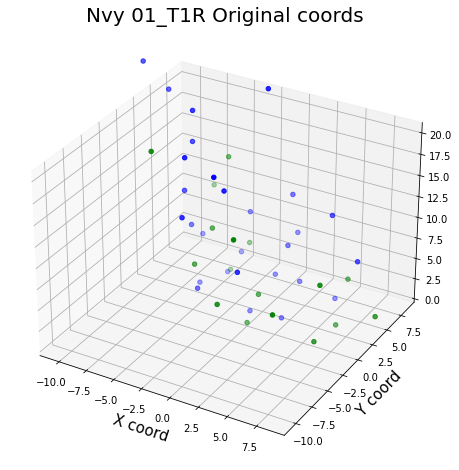

Plotting  Nvy 01_T1R  (Active cells are in green)


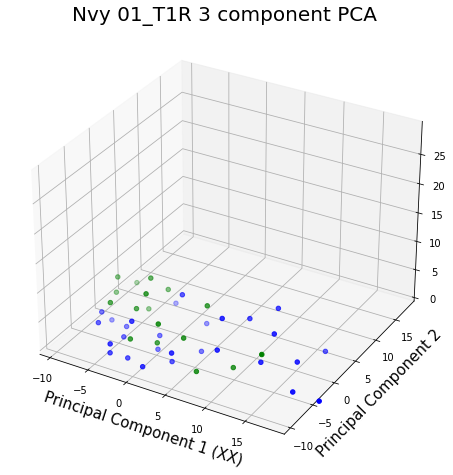

In [8]:
plot_experiment(df, exp_name, view = 'original')
plot_experiment(df, exp_name, view = 'pca')

#### Computing the means of nb of active values for each TF:

In [9]:
# initialization of dictionaries
countdic = {}
countdic2 = {}
for name in TFlist:
    countdic[name] = []

# count the number of active values for all experiments in the databasis
for name in all_expe_names:
    subdf = df[df['TFname'] == name]
    subdf2 = subdf[subdf['Type'] != 'NB']
    subdf3 = subdf2[subdf2['Type'] != 'GMC']
    tf = name.split()[0]
    countdic[tf].append(subdf3['TF'].value_counts()['*'])
    #print(name, " --> ", subdf3['TF'].value_counts().values[0])

# Mean values of activity (* value) for each TF detected automatically in the databasis
# NB and GMC cells are not counted here.
meandic = {}
for name in TFlist:
    meandic[name] = int(round(np.mean(countdic[name])))

print ("Mean nb of active cells for each TF : ", meandic)

Mean nb of active cells for each TF :  {'Brc': 20, 'cas': 19, 'Chinmo': 18, 'Eyeless': 10, 'Kr': 4, 'Lov': 4, 'Nvy': 14, 'Olig': 28, 'Pros': 26, 'RunxA': 15, 'Zfh1': 13, 'Zfh2': 4, 'Jim': 8, 'MamoS': 9, 'Runt': 24, 'Foxp': 10, 'Mamo': 19}


### Analysis of TF spans in space

The detection of TF spans is made in 3 major generic steps:

1. Compute the histogram of the activity of each TF, as seen in the collection of experiments related to this TF

2. Detect the peaks of the histogram (generally 1 or 2). This is made using a method based on defining peak minimal characteristics: min distance, min height, min prominence (i.e. peak's own height, with respect to its basis)

3. Find the span of the TF based on the identified peaks, using the known average lengths of TF expressions

#### 1. Distribution of a particular TF expression intensity along the chosen spatial criterion (x-axis or distance) 

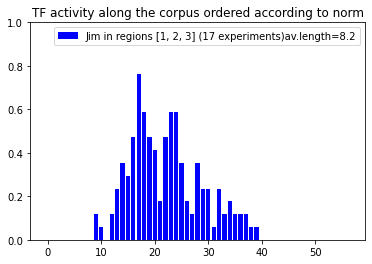

In [10]:
# Parameters defining the collection of experiments to consider for each TF
TF_name = 'Jim'         # 'Brc', ...
region_list = [1,2,3]
ordering_method = 'norm'  # name of the ordering_method: 'XX' or 'norm'
ascending_order = False # cells ordered from low to high values (ascending order)
                        # or from high to low (descending order)
TFsamplesize = 0        # 0 for all sample (no restriction).
                        # 1, 2, ... to make a rapid test on a restricted sample of
                        # the first TFs in list

# Example: histogram of the active TF in the chosen collection of experiments
# ascending_order set to False means that NB (ventral) will be
# on the right of the distribution
TFdist, nb_expe = TF_distribution(df, TF_name, region_list, ordering_method, ascending_order, TFsamplesize, normalized = True, smoothed = False, show = True)

Apply a Savitzky-Golay filter to the previous distribution
(with a window of size 11 and a polynomial order of 3 to fit the sample)

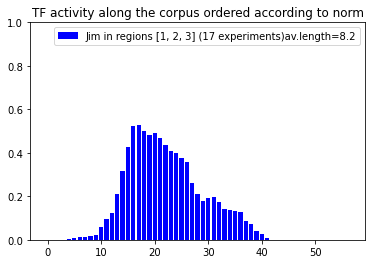

In [11]:
TFdist, nb_expe = TF_distribution(df, TF_name, region_list, ordering_method, ascending_order, TFsamplesize, normalized = True, smoothed = True, show = True)

In [12]:
# Save all distributions (both raw and smoothed) in Result/ directory as .csv files 
for name in TFlist:
    TFdist, nb_expe = TF_distribution(df, name, region_list, ordering_method, ascending_order, TFsamplesize, normalized = True, smoothed = False, show = False, printcsv = True)
    TFdist, nb_expe = TF_distribution(df, name, region_list, ordering_method, ascending_order, TFsamplesize, normalized = True, smoothed = True, show = False, printcsv = True)
os.listdir('Results')    

['TFdist_Foxp_smoothed.csv',
 'TFdist_Jim.csv',
 'TFdist_cas_smoothed.csv',
 'TFdist_Zfh1.csv',
 'TFdist_RunxA_smoothed.csv',
 'TFdist_Zfh2.csv',
 'TFdist_MamoS.csv',
 'TFdist_Eyeless.csv',
 'TFdist_Eyeless_smoothed.csv',
 'TFdist_Olig.csv',
 'TFdist_Runt_smoothed.csv',
 'TFdist_Zfh1_smoothed.csv',
 'TFdist_Kr.csv',
 'TFdist_Brc_smoothed.csv',
 'TFdist_Nvy.csv',
 'TFdist_Pros_smoothed.csv',
 'TFdist_Foxp.csv',
 'TFdist_Lov.csv',
 'TFdist_Chinmo_smoothed.csv',
 'TFdist_Zfh2_smoothed.csv',
 'TFdist_Mamo.csv',
 'TFdist_Lov_smoothed.csv',
 'TFdist_Olig_smoothed.csv',
 'TFdist_Chinmo.csv',
 'TFdist_Mamo_smoothed.csv',
 'TFdist_Kr_smoothed.csv',
 'TFdist_Jim_smoothed.csv',
 'TFdist_MamoS_smoothed.csv',
 'TFdist_RunxA.csv',
 'TFdist_Pros.csv',
 'TFdist_Nvy_smoothed.csv',
 'TFdist_cas.csv',
 'TFdist_Runt.csv',
 'TFdist_Brc.csv']

#### 2. Detection of histogram peaks and estimate active TF region positions (TF spans)

For a given TF (TF_name), the method to estimate the position of the active cells span proceeds in 4 steps:
- a. The number of peaks is detected according to peak prominence criterion in the histogram, as well as the span of each peak (region span = [b,e])
- b. Then, for each individual experience associated with this TF and for each detected peak, one computes the number of active cells in the region [b,e] spanned by the peak in this experiment (= number of cells of this experiment having contributed to the detection of that peak for this TF).
- c. The average of this number of active cells for each peak is then computed (= average width)
- d. Finally, the altitude and position of such an average width is computed so that these data fit the peak (green line) indicated by h (h = relative depth of the found altitude from the highest point of the peak (= red cross) to the total height of this peak, i.e. depth from its basis, considered as h = 1).  

Jim     : PEAK # 1
	tot basis (h=1): 42.4  [1.6 ,44.0 ]
	rel basis = 42.0  [2.0 ,44.0 ]
	span (h= 0.2 ) [14.8 ,23.1 ] average width = 8.2 , computed width at h = 8.23  at y =0.41
	(converg. criterion = 0.009)


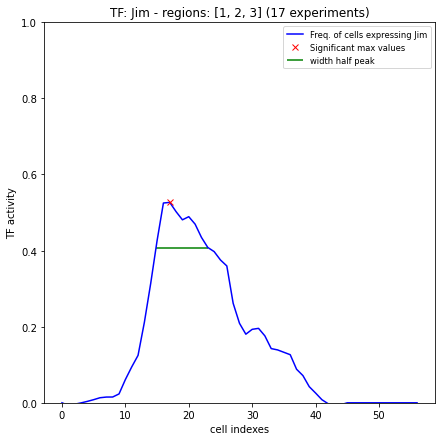

In [13]:
# First illustrate on a given TF
#TF_name = 'Nvy'  # Do not take a TF with a bimodal histogram (e.g like Nvy) for the manual test
TF_name = 'Jim'
# retrieves all experience names based on this TF_name
subdf = sub_dataframefromTFname(df,TF_name)
all_expe_names = subdf.TFname.unique()

# Computes TF average estimated span over the entire maximal span [0,55]
# using the estimated actual span detected as the minimal span
# encompassing all the active value of each experiment
average_spans = TF_average_span_length(df, all_expe_names, [[0,55]], sort_column = ordering_method)

# Computes result of TF span automatic detection on a given TF
peaks, width_half, width_full, TFdist_modified, h_list, average_estimated_span_list=find_TF_span_automatic(df, TF_name,region_list,ordering_method,plot = True)

#### Plot the active TF region spans in a unique diagram


Brc     : PEAK # 1
	tot basis (h=1): 48.3  [0.0 ,48.3 ]
	rel basis = 48.0  [0.0 ,48.0 ]
	span (h= 0.3 ) [15.7 ,35.8 ] average width = 20.1 , computed width at h = 20.07  at y =0.57
	(converg. criterion = 0.003)
cas     : PEAK # 1
	tot basis (h=1): 36.7  [8.0 ,44.7 ]
	rel basis = 37.0  [8.0 ,45.0 ]
	span (h= 0.3 ) [19.1 ,37.6 ] average width = 18.5 , computed width at h = 18.54  at y =0.63
	(converg. criterion = 0.009)
Chinmo  : PEAK # 1
	tot basis (h=1): 38.8  [0.0 ,38.8 ]
	rel basis = 39.0  [0.0 ,39.0 ]
	span (h= 0.6 ) [0.4 ,18.9 ] average width = 18.4 , computed width at h = 18.44  at y =0.41
	(converg. criterion = 0.004)
Eyeless : PEAK # 1
	tot basis (h=1): 43.7  [9.0 ,52.7 ]
	rel basis = 44.0  [9.0 ,53.0 ]
	span (h= 0.3 ) [31.0 ,41.4 ] average width = 10.5 , computed width at h = 10.46  at y =0.62
	(converg. criterion = 0.000)
Kr      : PEAK # 1
	tot basis (h=1): 14.4  [0.0 ,14.4 ]
	rel basis = 14.0  [0.0 ,14.0 ]
	span (h= 0.1 ) [1.1 ,5.4 ] average width = 4.3 , computed width at h

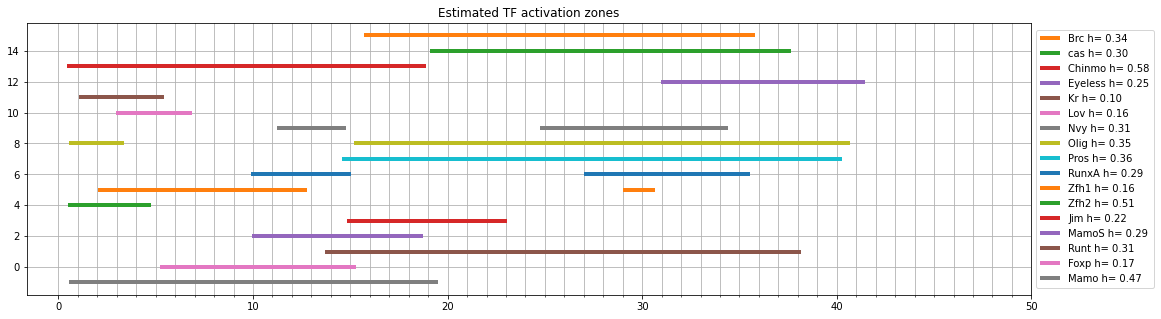

In [14]:
plot_TF_spans_basedon_average(df, TFlist, region_list, ordering_method = ordering_method)

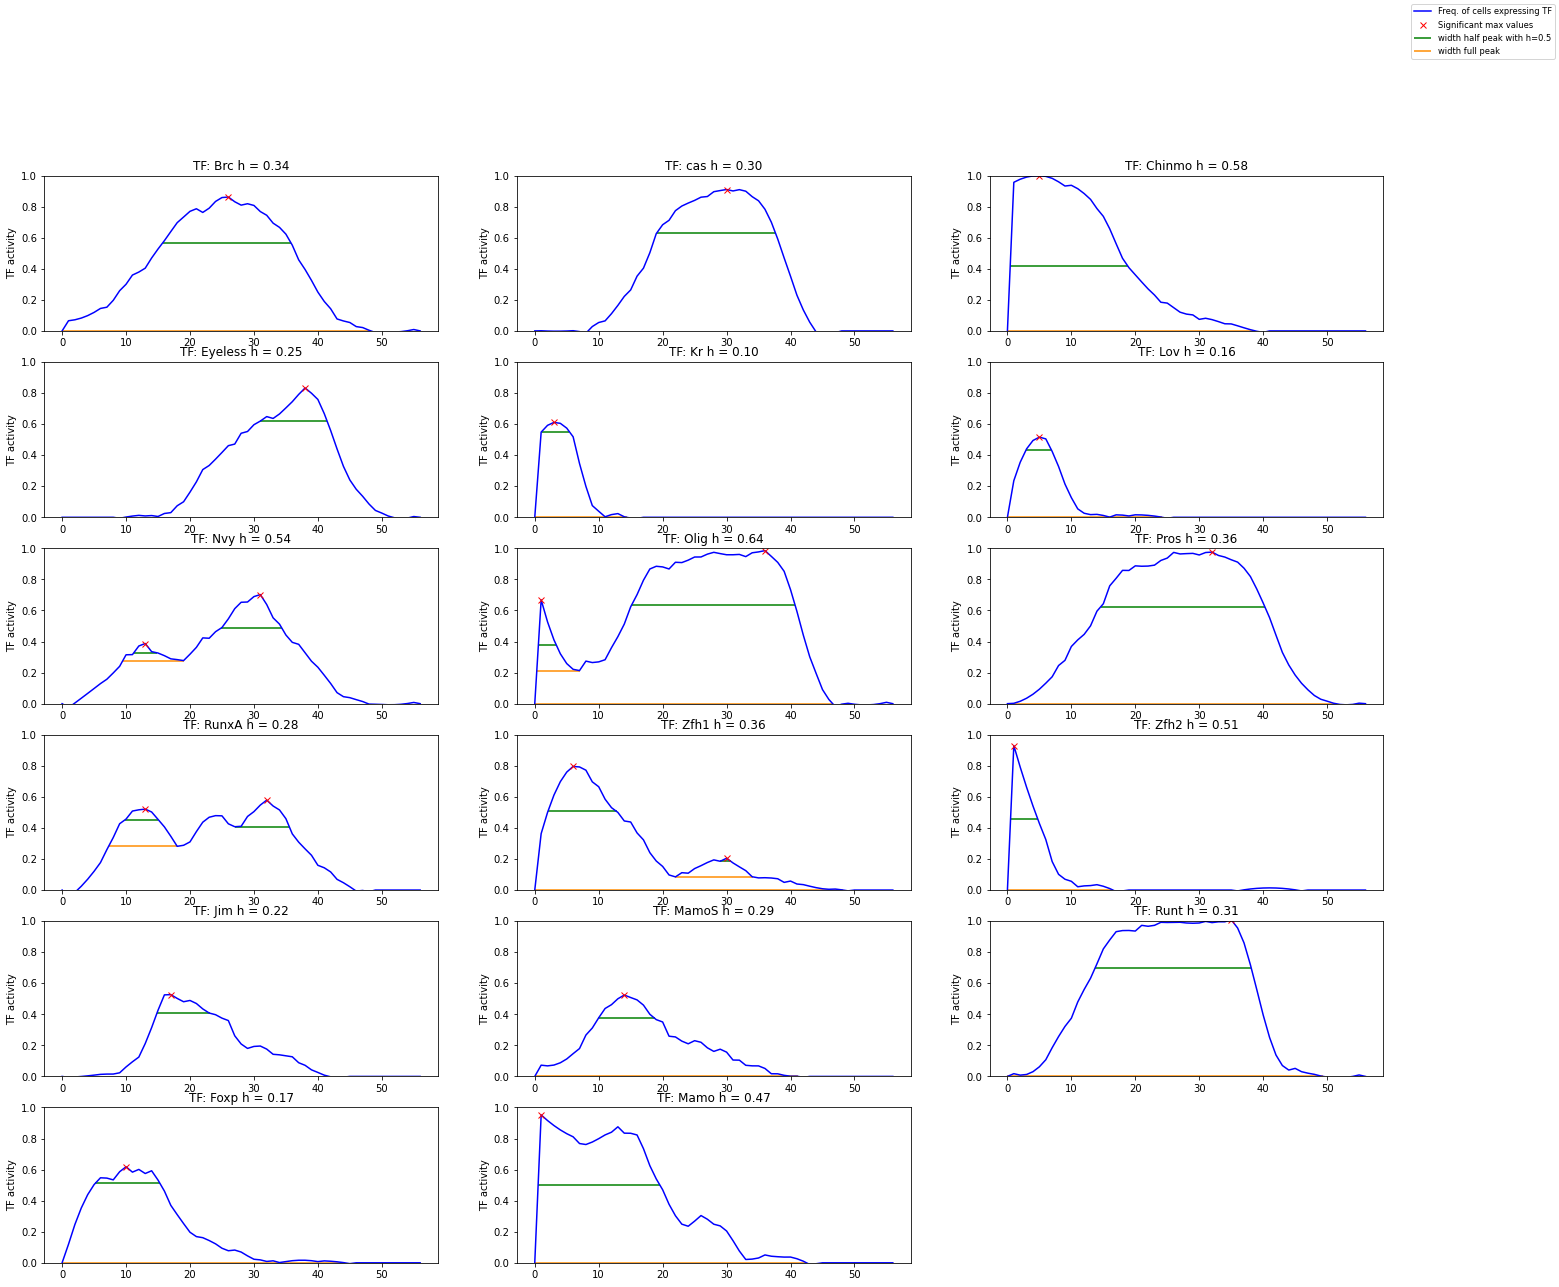

In [15]:
# Plot the detail of all TF distributions and span estimates at h = 0.4 and h = 1.0
plot_TF_distributions_basedon_average(df, region_list, TFlist, ordering_method = ordering_method, verbose = False)